##### **<font color = 'skyblue'> Testing the model: </font>** 

- Installing the requirements based on instructions from the README.md file.

In [1]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


- Importing the predict function functionalities from the predict.py file

In [2]:
from predict import *

- Creating a test student and testing the predict function

In [3]:
test_student = {
        "student_id": "student1",
        "major": "Computer Science",
        "age": "20",
        "gender": "M",
        "gpa": "4.0",
        "extra_curricular": "Men's Basketball",
        "num_programming_languages": "1",
        "num_past_internships": "2"
    }

In [4]:
predict(test_student)

{'good_employee': 1}

##### **<font color = 'skyblue'> Evaluating the ML-model's peformance and fairness</font>** 

The model provided to us is pre-trained and we do not have any information on how it was trained. Hence, we will evaluate the model's performance and fairness.

When it comes to training the model itself, the ML engineer who worked on the project had the following assumptions:

- The model is used to predict whether a student will be a good candidate for a software engineering job. It is a binary classifier, where 1 means the student is a good candidate, and 0 means the student is not a good candidate.
- The model is trained on a dataset of students who have graduated from CMU, and have been working in the industry for at least 1 year.
- In order to prevent bias, they assumed that removing Gender (M, F) and Student ID from the dataset would be sufficient when it comes to training the model. They claimed that it is now Group Unaware, thus the model would be fair.

The model specification is as follows:

X variable (input parameters)
- Age (18 - 25)
- Major (Computer Science, Information Systems, Business, Math,
         Electrical and Computer Engineering, Statistics and Machine Learning)
- GPA (0 - 4.0)
- Extra Curricular Activities (Student Theatre, Buggy, Teaching Assistant, Student Government,
    Society of Women Engineers, Women in CS, Volleyball, Sorority, Men's Basketball,
    American Football, Men's Golf, Fraternity)
- Number of Programming Languages (1, 2, 3, 4, 5)
- Number of Past Internships (0, 1, 2, 3, 4)

Y variable (output)
- Good Candidate (0, 1)

A test dataset has been provided to us in the following format:

X variable
- Student ID
- Gender (M, F)
- Age (18 - 25)
- Major (Computer Science, Information Systems, Business, Math,
         Electrical and Computer Engineering, Statistics and Machine Learning)
- GPA (0 - 4.0)
- Extra Curricular Activities (Student Theatre, Buggy, Teaching Assistant, Student Government,
    Society of Women Engineers, Women in CS, Volleyball, Sorority, Men's Basketball,
    American Football, Men's Golf, Fraternity)
    - Likely Co-Ed (Student Theatre, Buggy, Teaching Assistant, Student Government)
    - Likely Majority Female (Society of Women Engineers, Women in CS, Volleyball, Sorority)
    - Likely Majority Male (Men's Basketball, American Football, Men's Golf, Fraternity)
- Number of Programming Languages (1, 2, 3, 4, 5)
- Number of Past Internships (0, 1, 2, 3, 4)

Y variable
- Good Candidate (0, 1)


##### **<font color = 'skyblue'> Thoughts on fairness</font>** 

The test dataset includes different students than those used for training, and their suitability is judged by a fair panel of recruiters, making the assessment relatively unbiased. Although it's good that 'Gender' and 'Student ID' were removed to reduce bias, other attributes, like extracurricular activities, could still contain bias. The comments about these activities, such as "Likely Co-Ed," "Likely Majority Female," or "Likely Majority Male," suggest that some activities might favor one gender, and this could affect the fairness of the model's assessments.

##### **<font color = 'skyblue'> Preliminary Analysis:</font>** 

Before doing a thorough evaluation of the fairness of the model, we will start by doing preliminary analysis on the test dataset, and run the model on the test dataset to get the accuracy of the model.

In [5]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


##### **<font color = 'skyblue'>Loading the ML-model and the test dataset</font>** 

In [6]:
df = pd.read_csv("student_data.csv")
model = pickle.load(open("model.pkl","rb"))

##### **<font color = 'skyblue'>Plotting the distribution of the test dataset features </font>** 

We will plot the distribution of the test dataset across all features (except Student ID).

In [7]:
df.head()

,Student ID,Gender,Age,Major,GPA,Extra Curricular,Num Programming Languages,Num Past Internships,Good Candidate
0,0,F,21,Statistics and Machine Learning,2.83,Sorority,4,1,0
1,1,M,20,Information Systems,2.89,Fraternity,5,3,0
2,2,F,20,Math,2.66,Teaching Assistant,3,1,0
3,3,M,20,Information Systems,2.48,Fraternity,5,0,0
4,4,F,21,Statistics and Machine Learning,3.30,Sorority,2,1,0


In [8]:
df.describe()

,Student ID,Age,GPA,Num Programming Languages,Num Past Internships,Good Candidate
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,249.500000,20.944000,2.905780,3.04600,2.052000,0.474000
std,144.481833,1.455025,0.839559,1.36073,1.407572,0.499824
min,0.000000,18.000000,0.000000,1.00000,0.000000,0.000000
25%,124.750000,20.000000,2.345000,2.00000,1.000000,0.000000
50%,249.500000,21.000000,2.990000,3.00000,2.000000,0.000000
75%,374.250000,22.000000,3.560000,4.00000,3.000000,1.000000
max,499.000000,25.000000,4.000000,5.00000,4.000000,1.000000


Gender 
- Categorical variable 
- We will create a bar chart to display the counts of each gender category, which includes Male and Female.

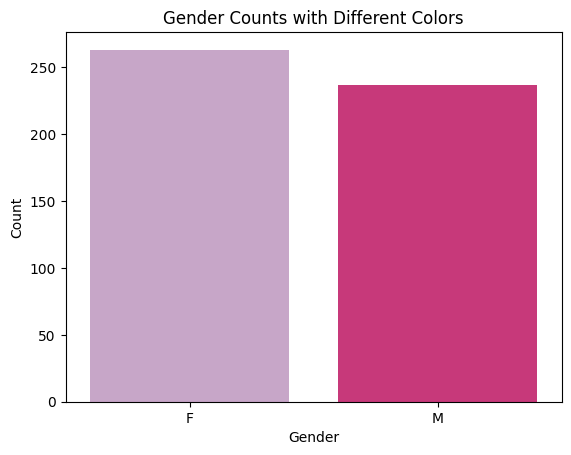

In [9]:
# gender_counts groups the gender by type and gives us the count of each gender
gender_counts = df["Gender"].value_counts()

# Using a purple-themed palette predefined in the seaborn library
custom_palette = "PuRd"

# plot
sns.barplot(x=gender_counts.index, y=gender_counts.values, hue=gender_counts.index, palette=custom_palette, legend=False)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Counts with Different Colors")
plt.show()



Age 
- Contnuous, numerical variable 
- We will create a histogram to visualize the distribution of age groups.

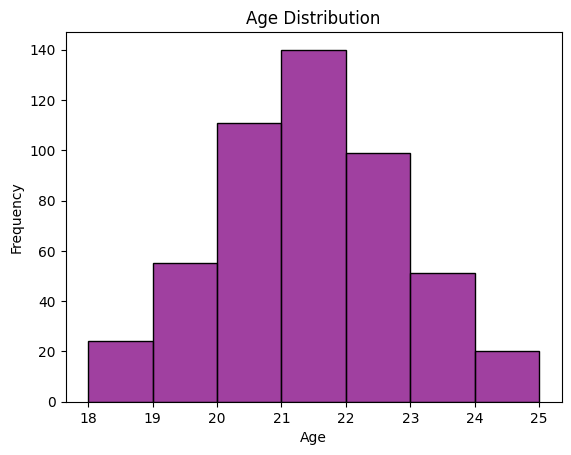

In [10]:
# Create a histogram using Seaborn
sns.histplot(df["Age"], bins=7, color="purple")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

Major  
- Categorical variable 
- We will create a bar chart to display the counts of each 'major' category.

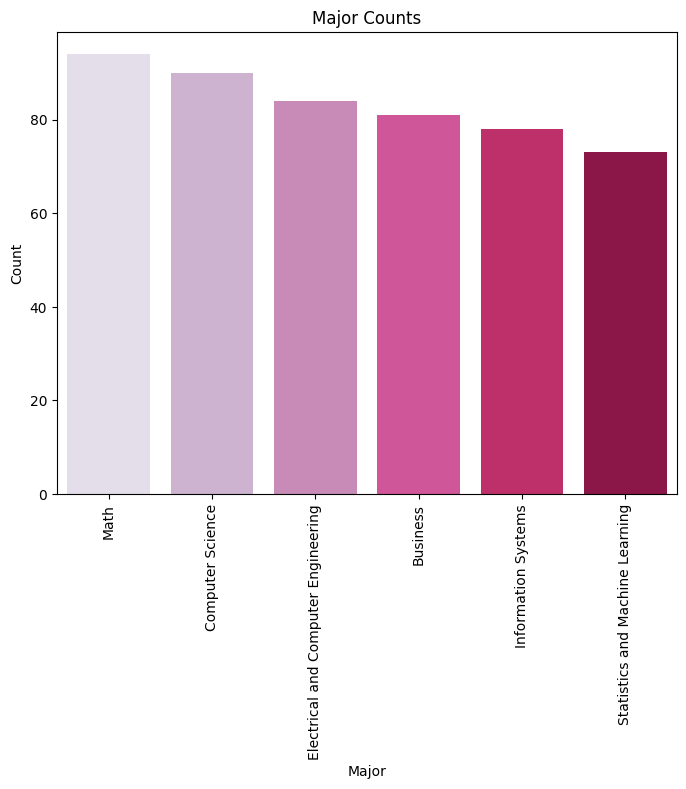

In [11]:
# Count the occurrences of each major category
major_counts = df["Major"].value_counts()

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create a bar plot
sns.barplot(x=major_counts.index, y=major_counts.values, hue=major_counts.index, palette=custom_palette, legend=False)

# Customize the plot labels and title
plt.xlabel("Major")
plt.ylabel("Count")
plt.title("Major Counts")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

GPA 
- Continuous, numerical variable 
- We will create a histogram to visualize the distrubution of GPAs.

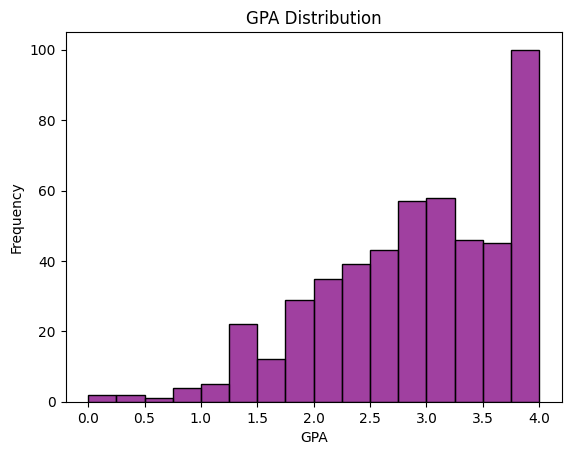

In [12]:
sns.histplot(df["GPA"], bins=16, color="purple")
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.title("GPA Distribution")
plt.show()

Extra Curricular 
- Categorical variable 
- We will create a bar chart to display the counts of each extra curricular activity

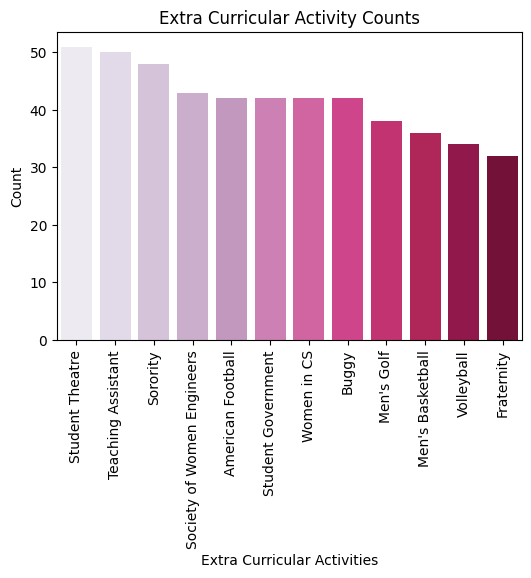

In [13]:
# Count the occurrences of each extra-curricular category
ec = df["Extra Curricular"].value_counts()

plt.figure(figsize=(6, 4))  # Adjust the figure size as needed

# Use a Seaborn palette for colors, for example, "colorblind"

# Create a bar plot
sns.barplot(x=ec.index, y=ec.values, hue=ec.index, palette=custom_palette, legend=False)

# Customize the plot labels and title
plt.xlabel("Extra Curricular Activities")
plt.ylabel("Count")
plt.title("Extra Curricular Activity Counts")

# Rotate x-plotis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

Num Programming Languages
- Continuous, numerical variable 
- We will create a barplot to visualize the distribution of the number of programming langauages known.

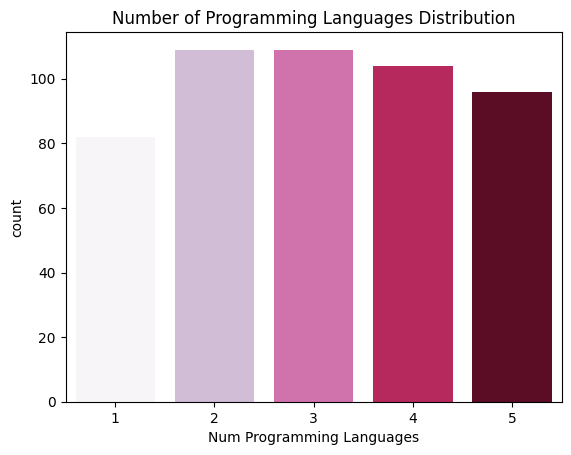

In [14]:
# Create the barplot
sns.countplot(data=df, x="Num Programming Languages", palette=custom_palette, hue="Num Programming Languages", legend=False)
plt.title("Number of Programming Languages Distribution")
plt.show()


Num Past Internships 
- Continuous, numerical 
- We will create a bar chart to display the distribution of number of past internships.

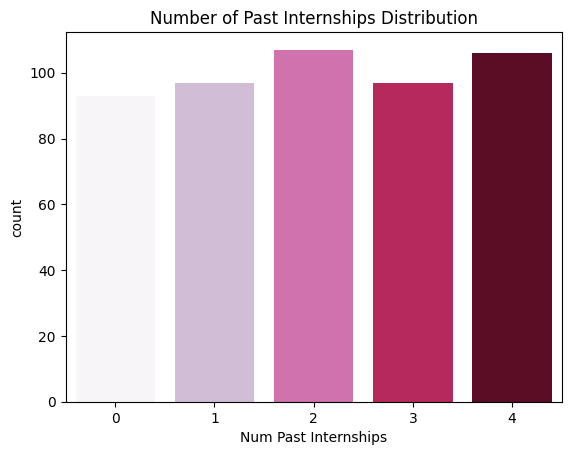

In [15]:
# Create the barplot
sns.countplot(data=df, x="Num Past Internships", palette=custom_palette, hue="Num Past Internships", legend=False)
plt.title("Number of Past Internships Distribution")
plt.show()

Good Candidate 
- Binary variable
- We will create a bar chart to show the distribution of candidates being classified as "good" (1) or not (0).


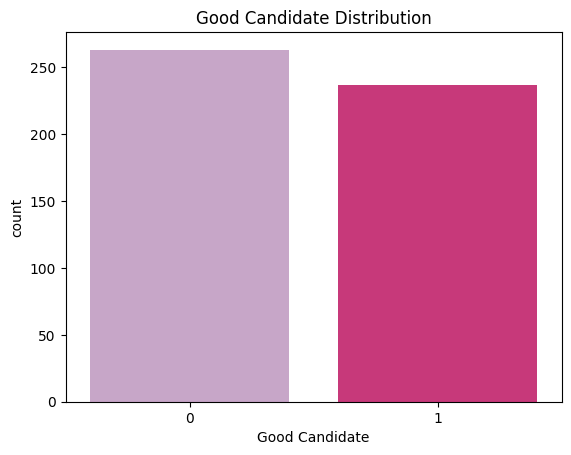

In [16]:
sns.countplot(data=df, x="Good Candidate", palette=custom_palette, hue="Good Candidate", legend=False)
plt.title("Good Candidate Distribution")
plt.show()

##### **<font color = 'skyblue'>Predicting the output of the test dataset using the model</font>** 

In [17]:
# we split the data into our inputs and the label
x_test = df.drop(["Good Candidate"], axis=1)
y_test = df["Good Candidate"]

In [18]:
y_pred = model.predict(x_test)

##### **<font color = 'skyblue'>Accuracy of the model</font>** 

In [19]:
# now we can compute the accuracy of those predictions
print('Accuracy Score: ', accuracy_score(y_pred, y_test))

Accuracy Score:  0.832


##### **<font color = 'skyblue'>Confusion Matrix</font>** 

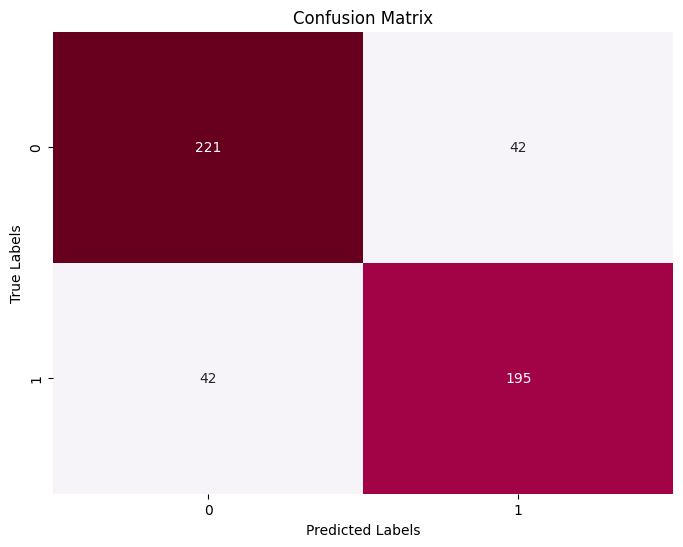

In [20]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=custom_palette, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

##### **<font color = 'skyblue'>Analysis:</font>** 

The accuracy score of 0.832 indicates that the model correctly predicted approximately 83.2% of the instances in the test dataset. 

Based on the confusion matrix:
- True Positives (TP): 195
- True Negatives (TN): 221
- False Positives (FP): 42
- False Negatives (FN): 42

This means the model correctly identified 195 positive cases and 221 negative cases, but it made 42 false positive errors and 42 false negative errors.

In the context of a career feature that predicts whether a student is a good candidate or not, an accuracy score of 0.832 is a positive sign, as it indicates that the model correctly predicts the majority of cases. However, it's crucial to consider the consequences of false positives and false negatives

- If the model incorrectly predicts that a student is a good candidate when they are not (false positive), it could lead to potentially wasted resources and opportunities if the student is not well-suited for a specific career. This could affect both the student and the employer.

- If the model incorrectly predicts that a student is not a good candidate when they are (false negative), it could mean missing out on potentially excellent candidates who may have valuable skills or potential.